In [1]:
import time
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from collections import OrderedDict

# Daten laden:

torch.set_printoptions(edgeitems=2, linewidth=75)

values = np.loadtxt('winequality-white.csv',skiprows=1,delimiter=';')

t_u = values[:, 0:11].astype(np.float32)  # INPUT
t_c = values[:, 11].astype(np.float32)    # OUTPUT
t_u = torch.tensor(t_u).unsqueeze(1)
t_c = torch.tensor(t_c).unsqueeze(1)


n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

# Normierung: 

t_un_train = t_u_train
t_un_train[:,:,0] = (1/14.2) * t_un_train[:,:,0]
t_un_train[:,:,1] = (1/1.1) * t_un_train[:,:,1]
t_un_train[:,:,2] = (1/1.7) * t_un_train[:,:,2]
t_un_train[:,:,3] = (1/66) * t_un_train[:,:,3]
t_un_train[:,:,4] = 3 * t_un_train[:,:,4]
t_un_train[:,:,5] = (1/289) * t_un_train[:,:,5]
t_un_train[:,:,6] = (1/440) * t_un_train[:,:,6]
t_un_train[:,:,7] = (1/1.1) * t_un_train[:,:,7]
t_un_train[:,:,8] = (1/3.9) * t_un_train[:,:,8]
t_un_train[:,:,9] = (1/1.1) * t_un_train[:,:,9]
t_un_train[:,:,10] = (1/14.5) * t_un_train[:,:,10]

t_un_val = t_u_val
t_un_val[:,:,0] = (1/14.2) * t_un_val[:,:,0]
t_un_val[:,:,1] = (1/1.1) * t_un_val[:,:,1]
t_un_val[:,:,2] = (1/1.7) * t_un_val[:,:,2]
t_un_val[:,:,3] = (1/66) * t_un_val[:,:,3]
t_un_val[:,:,4] = 3 * t_un_val[:,:,4]
t_un_val[:,:,5] = (1/289) * t_un_val[:,:,5]
t_un_val[:,:,6] = (1/440) * t_un_val[:,:,6]
t_un_val[:,:,7] = (1/1.1) * t_un_val[:,:,7]
t_un_val[:,:,8] = (1/3.9) * t_un_val[:,:,8]
t_un_val[:,:,9] = (1/1.1) * t_un_val[:,:,9]
t_un_val[:,:,10] = (1/14.5) * t_un_val[:,:,10]


def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    loss = np.zeros(n_epochs)
    start_time = time.time()  # Startzeitpunkt des Trainings

    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        loss[epoch-1] = loss_val
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
 
            
    end_time = time.time()  # Endzeitpunkt des Trainings
    execution_time = end_time - start_time  # Zeitdauer berechnen
    print("Die Ausführungszeit beträgt: ", execution_time, " Sekunden.")
    return loss 

neuron_count = 1000
lr = 1e-4
output_size = 1
input_size = 11  

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(input_size, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, output_size))
]))

optimizer = optim.SGD(seq_model.parameters(), lr)

loss = training_loop(
    n_epochs = 5000, 
    optimizer = optimizer, 
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)



/Users/aronhemmis/anaconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([3919, 1])) that is different to the input size (torch.Size([3919, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/aronhemmis/anaconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([979, 1])) that is different to the input size (torch.Size([979, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Training loss 35.2772, Validation loss 35.5674
Epoch 1000, Training loss 0.8029, Validation loss 0.7827
Epoch 2000, Training loss 0.8021, Validation loss 0.7819
Epoch 3000, Training loss 0.8013, Validation loss 0.7812
Epoch 4000, Training loss 0.8006, Validation loss 0.7805
Epoch 5000, Training loss 0.8000, Validation loss 0.7799
Die Ausführungszeit beträgt:  77.08489799499512  Sekunden.


<function matplotlib.pyplot.show(close=None, block=None)>

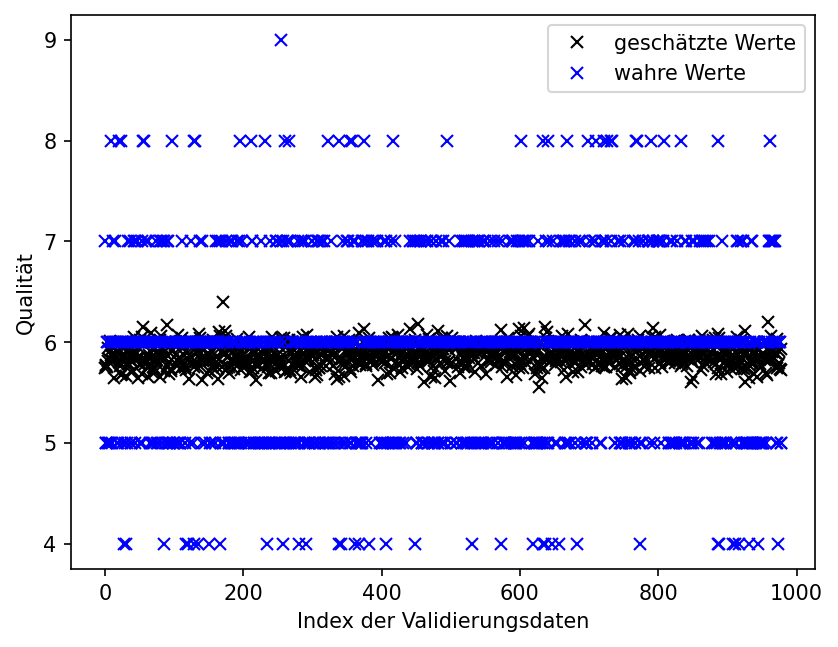

In [2]:

#t_range = torch.arange(20., 90., step=5).unsqueeze(1)

results = seq_model(t_u_val)
fig = plt.figure(dpi=150)
plt.xlabel("Index der Validierungsdaten")
plt.ylabel("Qualität")
plt.plot(results[:,0,0].detach().numpy(), 'kx',label = 'geschätzte Werte') 
plt.plot(t_c_val[:,0].detach().numpy(), 'bx',label = 'wahre Werte') 
plt.legend()
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

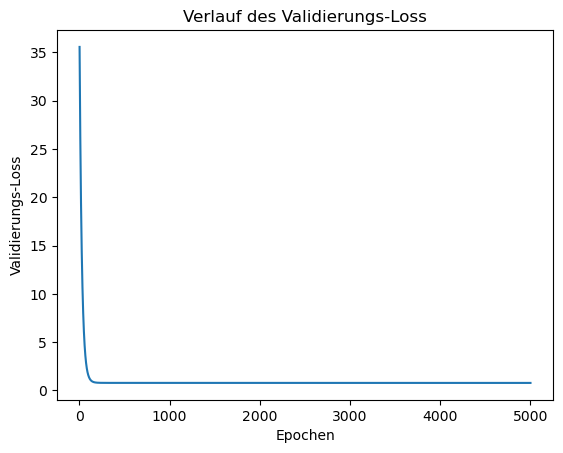

In [3]:
# Plotten des Validation-Loss: 

epochs = np.arange(1, 5001, 1)

plt.plot(epochs, loss)
plt.xlabel("Epochen")
plt.ylabel("Validierungs-Loss")
plt.title("Verlauf des Validierungs-Loss")
plt.show